This notebook reproduces Figure 3 in "Integrating human biophysics and data-driven analysis to assess humidity’s role in heatstroke prediction" by Kong et al.

In [1]:
"""
import python packages
please install required packages before running this notebook
"""
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read in Japan prefecture-level effective beta of existing heat stress indices
HSI_beta=xr.open_dataset('../data/Prefecture_level_HSI_effective_beta.nc').beta

# read in mean absolute prediction error of GHSI
mae=xr.open_dataset('../data/GHSI_MAE.nc').MAE
# calculate optimal beta with lowest MAE for outdoor GHSI
optimal_beta=mae.sel(exposure='outdoor').idxmin(dim='beta')

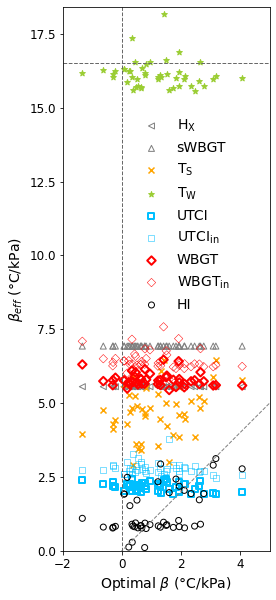

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
x=optimal_beta # x variable as calibrated optimal beta for each prefecture

ax.scatter(x, HSI_beta.sel(var='Hx'), marker='<',facecolors='none', edgecolors='grey',label=r'$\mathrm{H}_{\mathrm{X}}$') # Humidex
ax.scatter(x, HSI_beta.sel(var='sWBGT'), marker='^',facecolors='none', edgecolors='grey',label='sWBGT') # simplified WBGT
ax.scatter(x, HSI_beta.sel(var='Ts'), marker='x',c='orange',label=r'$\mathrm{T}_{\mathrm{S}}$') # lethal temperature
ax.scatter(x, HSI_beta.sel(var='Tw'), marker='*',c='yellowgreen',label=r'$\mathrm{T}_{\mathrm{W}}$') # wet-bulb temperature
ax.scatter(x, HSI_beta.sel(var='UTCI'), marker='s', facecolors='none', edgecolors='deepskyblue', linewidths=2,label='UTCI') # outdoor UTCI
ax.scatter(x, HSI_beta.sel(var='UTCIin'), marker='s', facecolors='none', edgecolors='deepskyblue', linewidths=0.5,label=r'$\mathrm{UTCI}_{\mathrm{in}}$') # indoor UTCI
ax.scatter(x, HSI_beta.sel(var='WBGT'), marker='D', facecolors='none', edgecolors='red', linewidths=2,label='WBGT') # outdoor WBGT
ax.scatter(x, HSI_beta.sel(var='WBGTin'), marker='D', facecolors='none', edgecolors='red', linewidths=0.5,label=r'$\mathrm{WBGT}_{\mathrm{in}}$') # indoor WBGT
ax.scatter(x, HSI_beta.sel(var='HI'),marker='o',facecolors='none', edgecolors='k',label='HI') # Heat Index

ax.set_xlabel(r'Optimal $\beta$ (°C/kPa)', fontsize=14)
ax.set_ylabel(r'$\beta_{eff}$ (°C/kPa)', fontsize=14)
ax.set_xlim(-2,5)
ax.set_ylim(0,18.4)
ax.plot([-2, 18.2], [-2, 18.2], color='gray', linestyle='--', linewidth=1)

ax.set_aspect('equal', adjustable='box') # set square aspect ratio
ax.axhline(y=16.5, color='dimgrey', linestyle='--', linewidth=1)
ax.axhline(y=0, color='dimgrey', linestyle='--', linewidth=1)
ax.axvline(x=0, color='dimgrey', linestyle='--', linewidth=1)

ax.legend(loc='upper left', bbox_to_anchor=(0.3, 0.82),frameon=False,fontsize=14)
ax.tick_params(axis='both', labelsize=12)

**Figure 3**. Optimal β calibrated for the outdoor formulation of General Heat Stress Index (GHSI, x-axis) versus βeff of existing heat stress indices (y-axis), with each point representing one prefecture. The diagonal 1:1 line indicates agreement between the two types of β values, and the horizontal dashed line marks the theoretical upper
bound of 16.5 ◦C/kPa. See Materials and Methods for the calculation of βeff .